In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

In [24]:
# Load the C-index results
cindex_mean = pd.read_csv('SYNTHETIC/results/result_CINDEX_FINAL_MEAN.csv', index_col=0)
cindex_std = pd.read_csv('SYNTHETIC/results/result_CINDEX_FINAL_STD.csv', index_col=0)

# Load the Brier score results
brier_mean = pd.read_csv('SYNTHETIC/results/result_BRIER_FINAL_MEAN.csv', index_col=0)
brier_std = pd.read_csv('SYNTHETIC/results/result_BRIER_FINAL_STD.csv', index_col=0)

# Display the loaded data
print("C-index Mean:")
display(cindex_mean)
print("\nC-index Standard Deviation:")
display(cindex_std)
print("\nBrier Score Mean:")
display(brier_mean)
print("\nBrier Score Standard Deviation:")
display(brier_std)

C-index Mean:


,12yr c_index,24yr c_index,36yr c_index
Event_1,0.767701,0.737316,0.723815
Event_2,0.760190,0.735807,0.715176



C-index Standard Deviation:


,12yr c_index,24yr c_index,36yr c_index
Event_1,0.002178,0.001667,0.001997
Event_2,0.001967,0.001599,0.001044



Brier Score Mean:


,12yr B_score,24yr B_score,36yr B_score
Event_1,0.542151,0.629525,0.656330
Event_2,0.542562,0.626730,0.654576



Brier Score Standard Deviation:


,12yr B_score,24yr B_score,36yr B_score
Event_1,0.034088,0.075910,0.107393
Event_2,0.036067,0.078267,0.107208


In [25]:
# Extract time points from column names
cindex_time_points = [int(col.split('yr')[0]) for col in cindex_mean.columns]
brier_time_points = [int(col.split('yr')[0]) for col in brier_mean.columns]

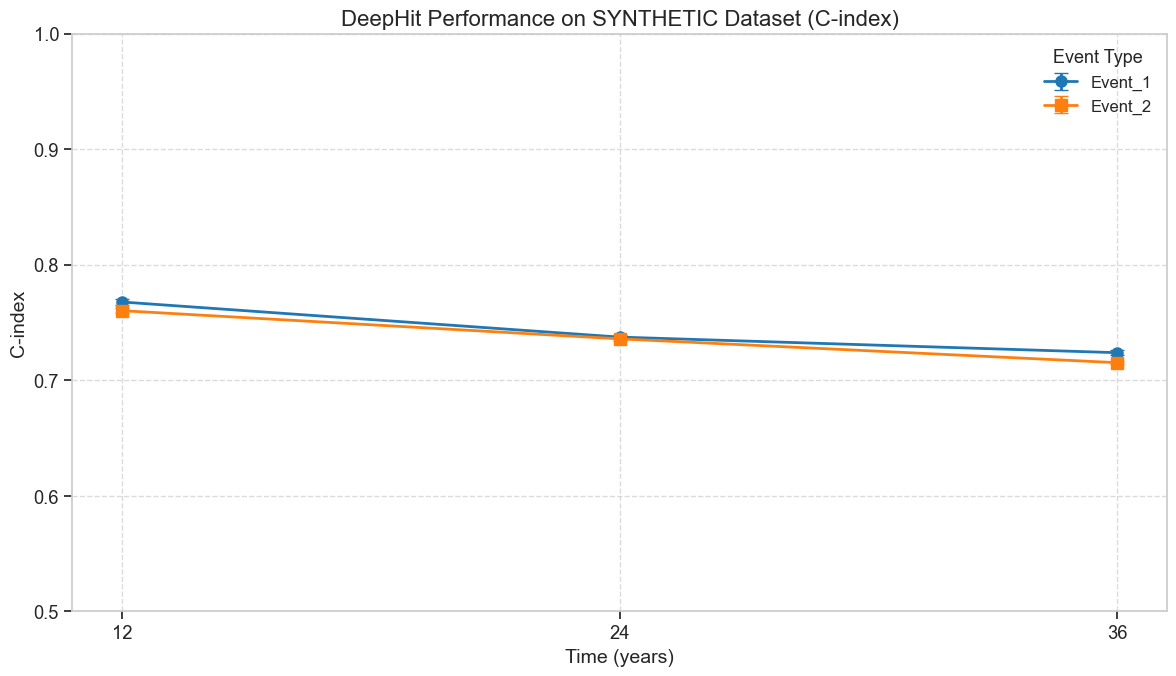

In [26]:
# Visualization 1: C-index performance over time for each event
plt.figure(figsize=(12, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', '^', 'D', 'v']

for i, event in enumerate(cindex_mean.index):
    plt.errorbar(
        cindex_time_points, 
        cindex_mean.loc[event], 
        yerr=cindex_std.loc[event],
        label=event,
        marker=markers[i % len(markers)],
        color=colors[i % len(colors)],
        capsize=5,
        linewidth=2,
        markersize=8
    )

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('C-index', fontsize=14)
plt.title('DeepHit Performance on SYNTHETIC Dataset (C-index)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title='Event Type', title_fontsize=13)
plt.ylim(0.5, 1.0)  # C-index ranges from 0.5 (random) to 1.0 (perfect)
plt.xticks(cindex_time_points)
plt.tight_layout()
plt.show()

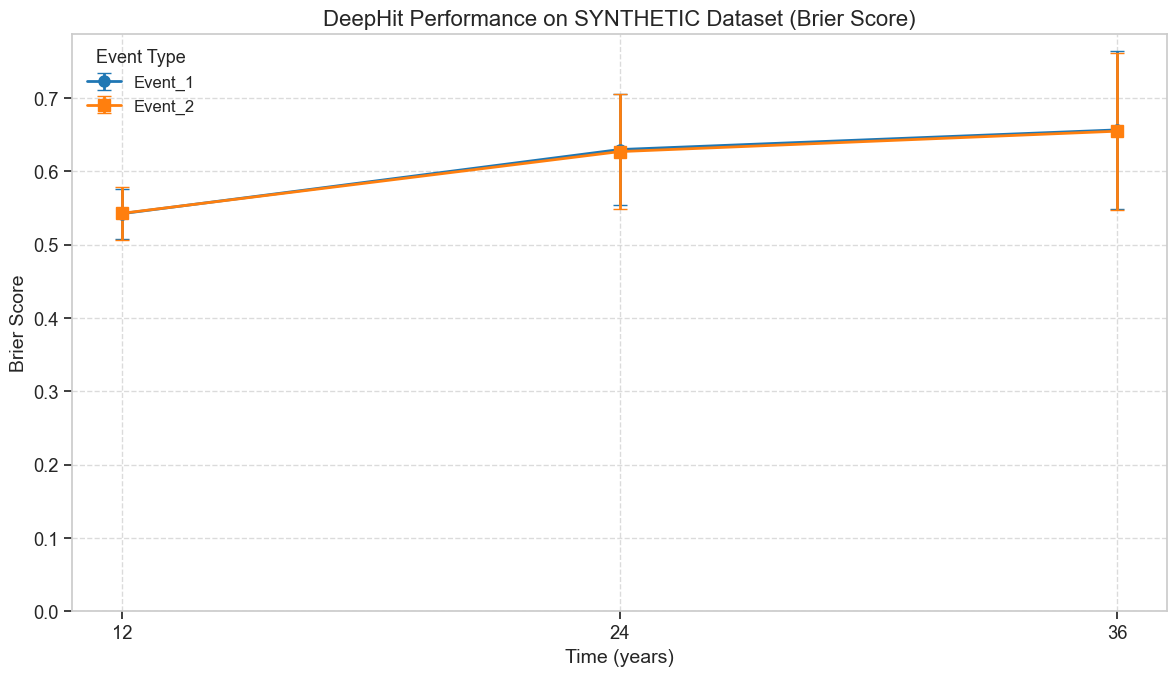

In [27]:
# Visualization 2: Brier score performance over time for each event
plt.figure(figsize=(12, 7))

for i, event in enumerate(brier_mean.index):
    plt.errorbar(
        brier_time_points, 
        brier_mean.loc[event], 
        yerr=brier_std.loc[event],
        label=event,
        marker=markers[i % len(markers)],
        color=colors[i % len(colors)],
        capsize=5,
        linewidth=2,
        markersize=8
    )

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Brier Score', fontsize=14)
plt.title('DeepHit Performance on SYNTHETIC Dataset (Brier Score)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title='Event Type', title_fontsize=13)
plt.ylim(0, brier_mean.values.max() * 1.2)  # Lower Brier score is better
plt.xticks(brier_time_points)
plt.tight_layout()
plt.show()

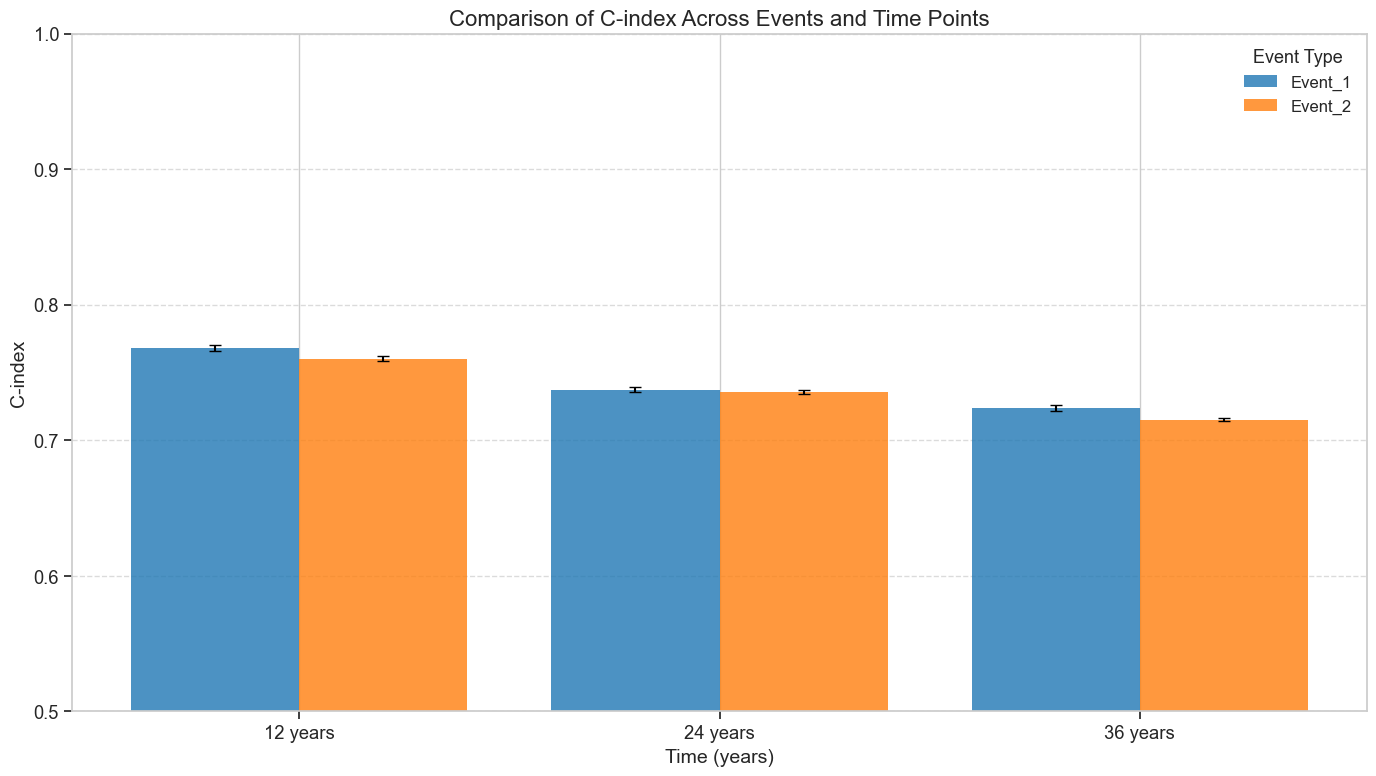

In [28]:
# Visualization 3: Bar chart comparing C-index across events and time points
plt.figure(figsize=(14, 8))

x = np.arange(len(cindex_time_points))
width = 0.8 / len(cindex_mean.index)
offset = width * np.arange(len(cindex_mean.index)) - width * len(cindex_mean.index) / 2 + width / 2

for i, event in enumerate(cindex_mean.index):
    plt.bar(
        x + offset[i], 
        cindex_mean.loc[event], 
        width=width, 
        color=colors[i % len(colors)], 
        label=event,
        yerr=cindex_std.loc[event],
        capsize=4,
        alpha=0.8
    )

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('C-index', fontsize=14)
plt.title('Comparison of C-index Across Events and Time Points', fontsize=16)
plt.xticks(x, [f'{t} years' for t in cindex_time_points])
plt.legend(fontsize=12, title='Event Type', title_fontsize=13)
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

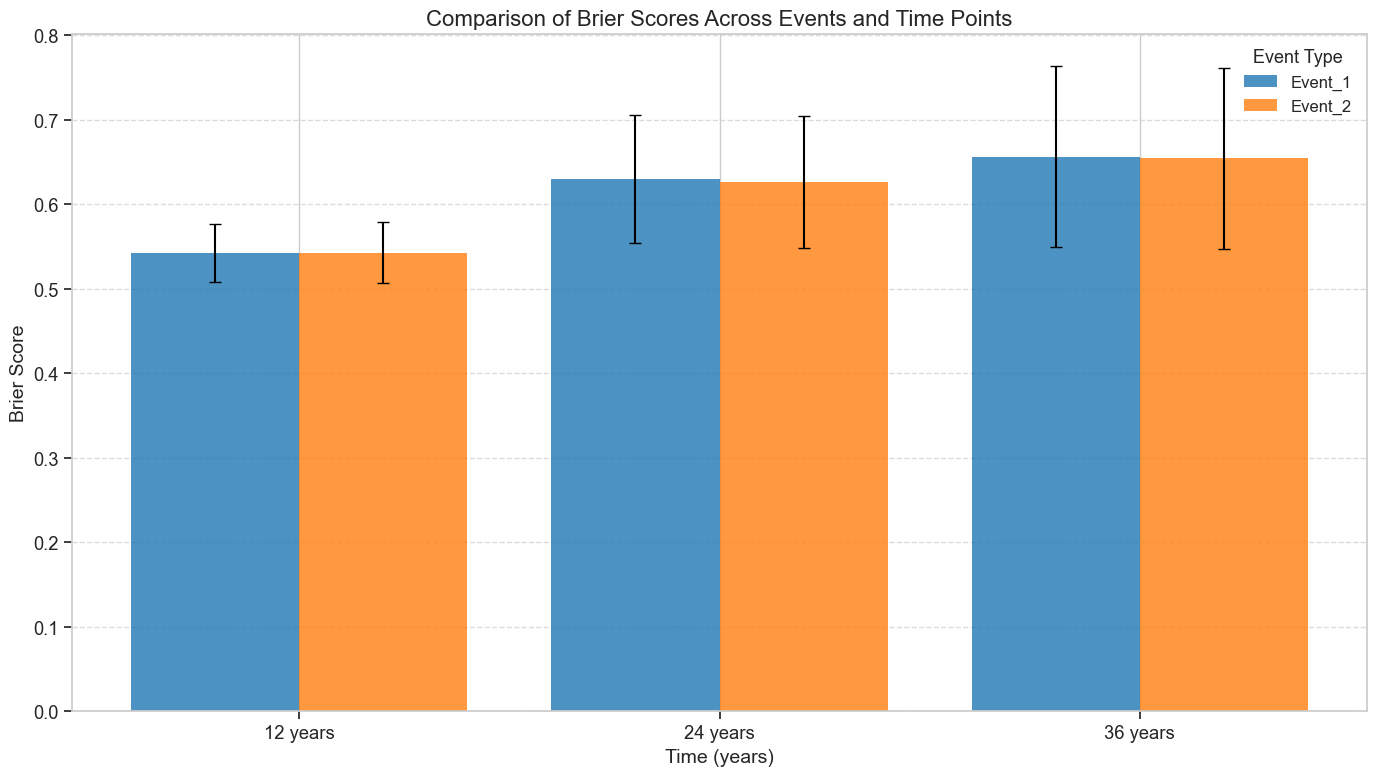

In [29]:
# Visualization 4: Bar chart comparing Brier scores across events and time points
plt.figure(figsize=(14, 8))

x = np.arange(len(brier_time_points))
width = 0.8 / len(brier_mean.index)
offset = width * np.arange(len(brier_mean.index)) - width * len(brier_mean.index) / 2 + width / 2

for i, event in enumerate(brier_mean.index):
    plt.bar(
        x + offset[i], 
        brier_mean.loc[event], 
        width=width, 
        color=colors[i % len(colors)], 
        label=event,
        yerr=brier_std.loc[event],
        capsize=4,
        alpha=0.8
    )

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Brier Score', fontsize=14)
plt.title('Comparison of Brier Scores Across Events and Time Points', fontsize=16)
plt.xticks(x, [f'{t} years' for t in brier_time_points])
plt.legend(fontsize=12, title='Event Type', title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

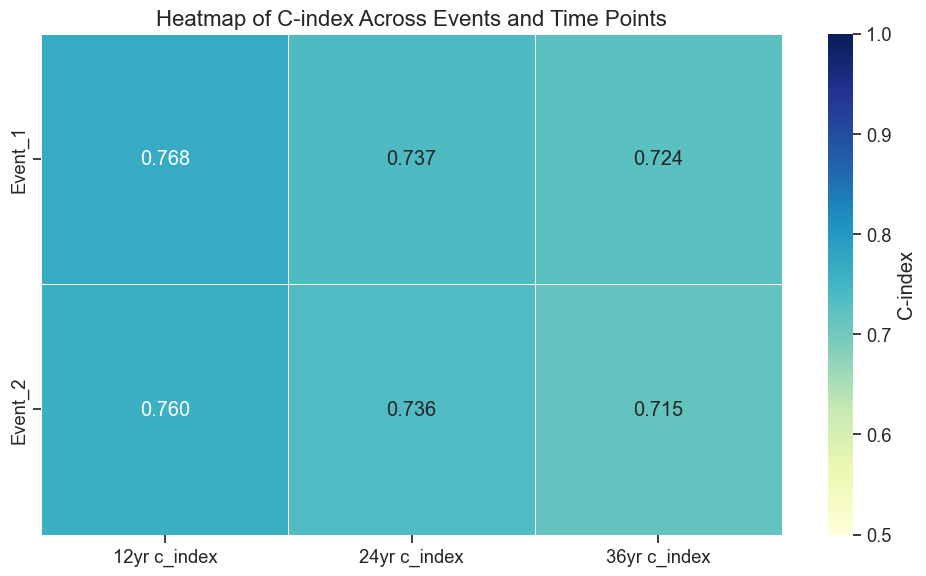

In [30]:
# Visualization 5: Heatmap of C-index across events and time points
plt.figure(figsize=(10, 6))
sns.heatmap(
    cindex_mean, 
    annot=True, 
    cmap='YlGnBu', 
    fmt='.3f',
    linewidths=.5,
    vmin=0.5, 
    vmax=1.0,
    cbar_kws={'label': 'C-index'}
)
plt.title('Heatmap of C-index Across Events and Time Points', fontsize=16)
plt.tight_layout()
plt.show()

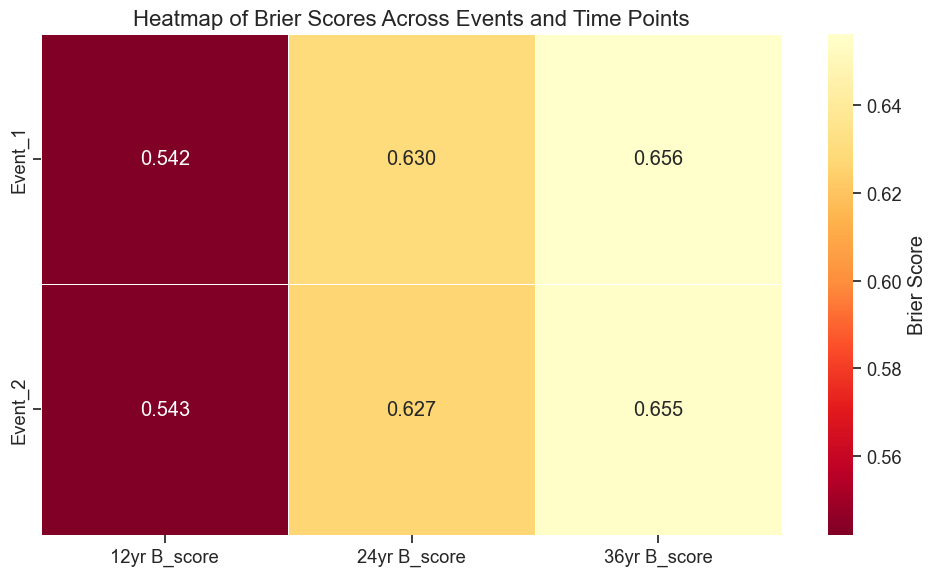

In [31]:
# Visualization 6: Heatmap of Brier scores across events and time points
plt.figure(figsize=(10, 6))
sns.heatmap(
    brier_mean, 
    annot=True, 
    cmap='YlOrRd_r',  # Reversed colormap so lighter is better
    fmt='.3f',
    linewidths=.5,
    cbar_kws={'label': 'Brier Score'}
)
plt.title('Heatmap of Brier Scores Across Events and Time Points', fontsize=16)
plt.tight_layout()
plt.show()

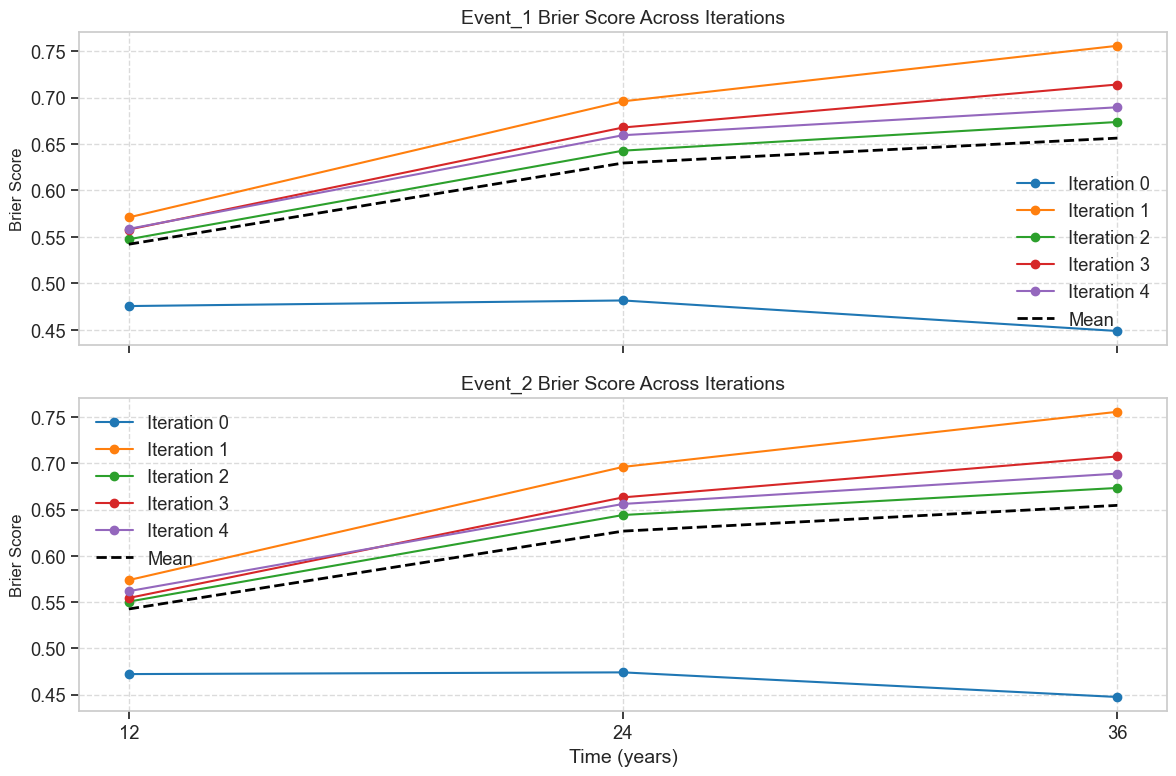

In [32]:
# Visualization 8: Performance comparison across iterations for Brier score
# Load individual iteration results
brier_iterations = []
for i in range(5):  # Assuming 5 iterations (0-4)
    try:
        df = pd.read_csv(f'SYNTHETIC/results/result_BRIER_itr{i}.csv', index_col=0)
        brier_iterations.append(df)
    except FileNotFoundError:
        print(f"File for iteration {i} not found")

if brier_iterations:
    # Create a figure with subplots for each event
    fig, axes = plt.subplots(len(brier_iterations[0].index), 1, figsize=(12, 4*len(brier_iterations[0].index)), sharex=True)
    
    for i, event in enumerate(brier_iterations[0].index):
        ax = axes[i] if len(brier_iterations[0].index) > 1 else axes
        
        # Plot each iteration
        for j, df in enumerate(brier_iterations):
            ax.plot(brier_time_points, df.loc[event], marker='o', label=f'Iteration {j}')
        
        # Plot the mean
        ax.plot(brier_time_points, brier_mean.loc[event], 'k--', linewidth=2, label='Mean')
        
        ax.set_title(f'{event} Brier Score Across Iterations', fontsize=14)
        ax.set_ylabel('Brier Score', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
    
    plt.xlabel('Time (years)', fontsize=14)
    plt.xticks(brier_time_points)
    plt.tight_layout()
    plt.show()

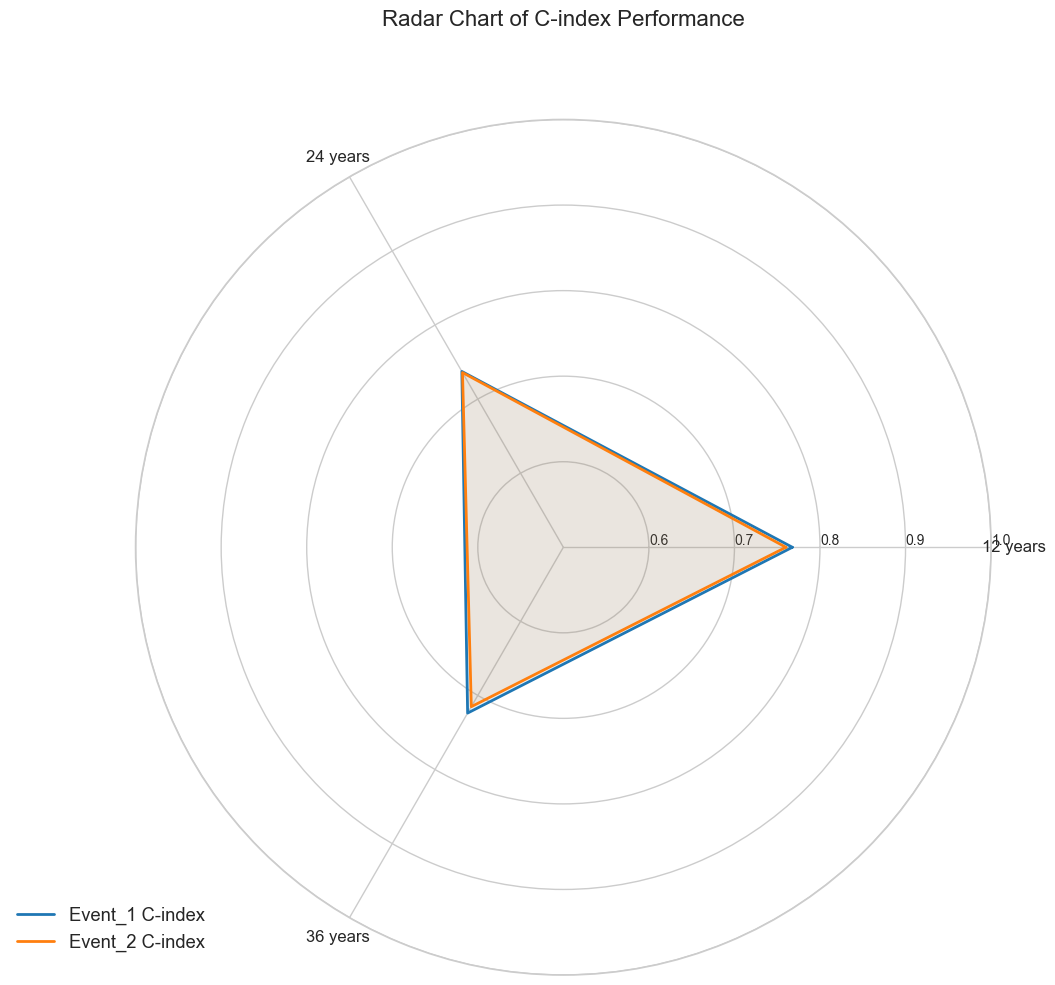

In [33]:
# Visualization 9: Radar chart comparing performance metrics
# Prepare data for radar chart
if len(cindex_mean.index) == 2:  # Assuming 2 events
    fig = plt.figure(figsize=(12, 10))
    
    # Categories for radar chart (time points)
    categories = [f'{t} years' for t in cindex_time_points]
    N = len(categories)
    
    # Create angles for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create subplot with polar projection
    ax = plt.subplot(111, polar=True)
    
    # Add category labels
    plt.xticks(angles[:-1], categories, fontsize=12)
    
    # Add radial lines
    ax.set_rlabel_position(0)
    plt.yticks([0.6, 0.7, 0.8, 0.9, 1.0], ["0.6", "0.7", "0.8", "0.9", "1.0"], fontsize=10)
    plt.ylim(0.5, 1.0)
    
    # Plot C-index for each event
    for i, event in enumerate(cindex_mean.index):
        values = cindex_mean.loc[event].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'{event} C-index', color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Radar Chart of C-index Performance', fontsize=16, y=1.1)
    plt.tight_layout()
    plt.show()

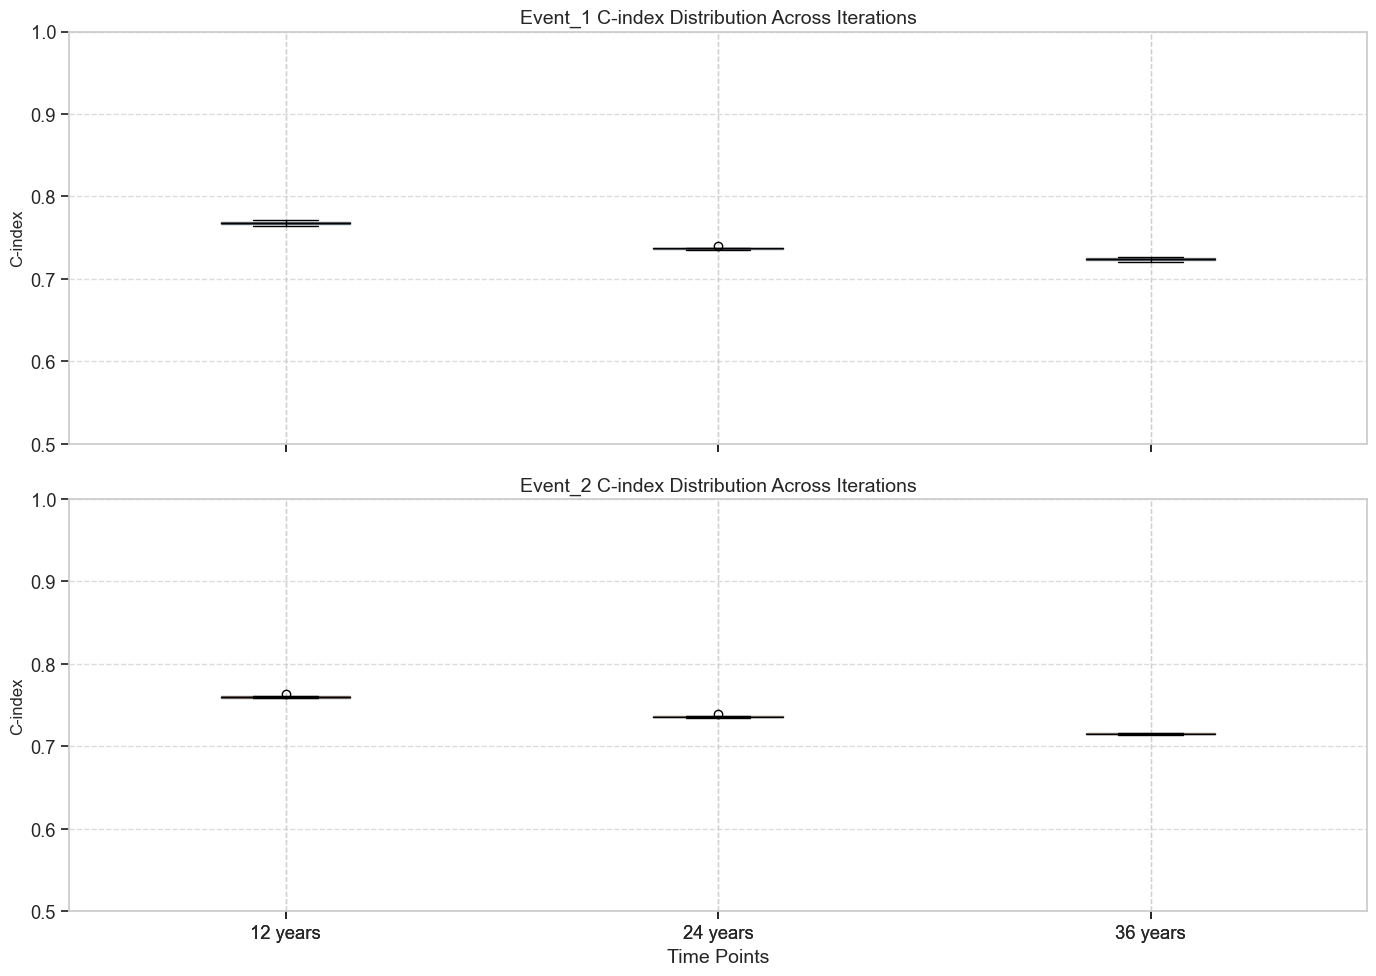

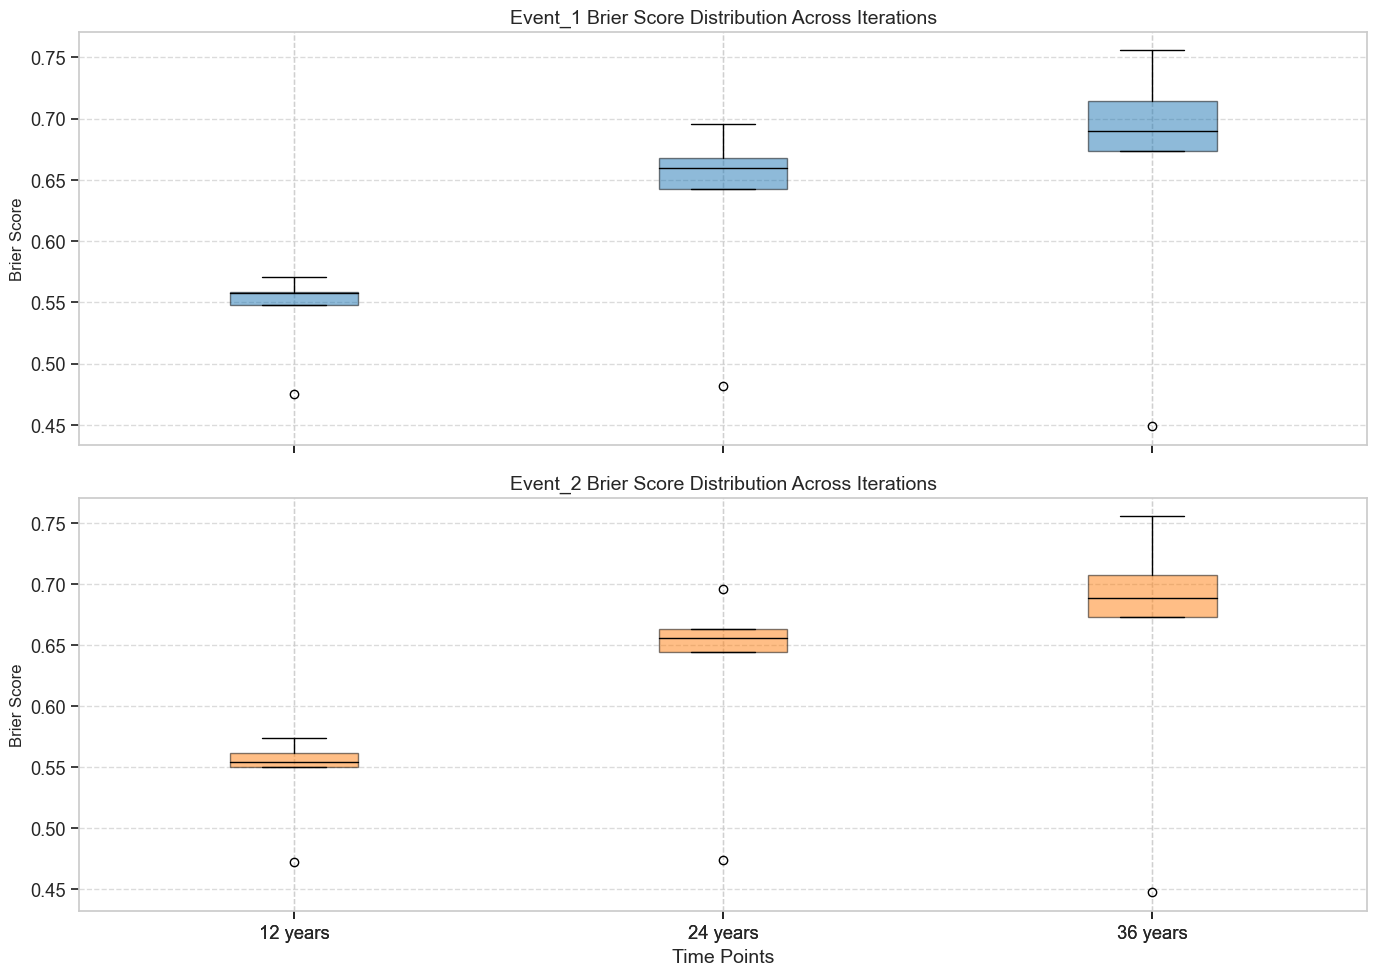

In [34]:
# Visualization 10: Box plots comparing performance across iterations
# Prepare data for box plots
if cindex_iterations and brier_iterations:
    # For C-index
    cindex_data = {event: [] for event in cindex_iterations[0].index}
    for event in cindex_iterations[0].index:
        for t_idx, t in enumerate(cindex_time_points):
            values = [df.loc[event].iloc[t_idx] for df in cindex_iterations]
            cindex_data[event].append(values)
    
    # For Brier score
    brier_data = {event: [] for event in brier_iterations[0].index}
    for event in brier_iterations[0].index:
        for t_idx, t in enumerate(brier_time_points):
            values = [df.loc[event].iloc[t_idx] for df in brier_iterations]
            brier_data[event].append(values)
    
    # Create box plots for C-index
    fig, axes = plt.subplots(len(cindex_data), 1, figsize=(14, 5*len(cindex_data)), sharex=True)
    
    for i, (event, data) in enumerate(cindex_data.items()):
        ax = axes[i] if len(cindex_data) > 1 else axes
        
        ax.boxplot(data, labels=[f'{t} years' for t in cindex_time_points], patch_artist=True,
                  boxprops=dict(facecolor=colors[i], alpha=0.5),
                  medianprops=dict(color='black'))
        
        ax.set_title(f'{event} C-index Distribution Across Iterations', fontsize=14)
        ax.set_ylabel('C-index', fontsize=12)
        ax.set_ylim(0.5, 1.0)
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xlabel('Time Points', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Create box plots for Brier score
    fig, axes = plt.subplots(len(brier_data), 1, figsize=(14, 5*len(brier_data)), sharex=True)
    
    for i, (event, data) in enumerate(brier_data.items()):
        ax = axes[i] if len(brier_data) > 1 else axes
        
        ax.boxplot(data, labels=[f'{t} years' for t in brier_time_points], patch_artist=True,
                  boxprops=dict(facecolor=colors[i], alpha=0.5),
                  medianprops=dict(color='black'))
        
        ax.set_title(f'{event} Brier Score Distribution Across Iterations', fontsize=14)
        ax.set_ylabel('Brier Score', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xlabel('Time Points', fontsize=14)
    plt.tight_layout()
    plt.show()

([<matplotlib.axis.XTick at 0x7aed51d258b0>,
 [Text(12, 0, '12'), Text(24, 0, '24'), Text(36, 0, '36')])

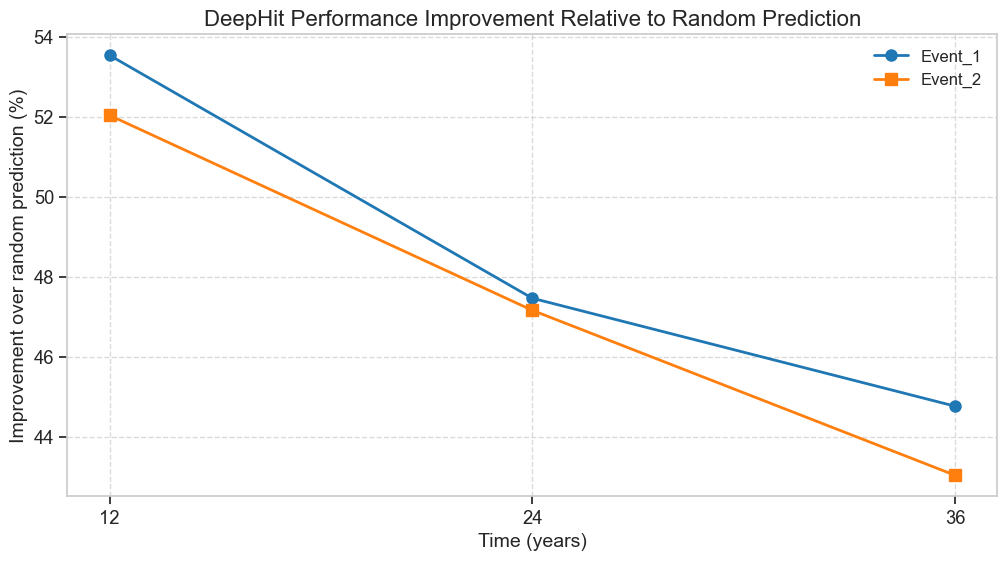

In [35]:
# Visualization 12: Performance improvement over baseline
# Calculate relative improvement over random prediction (C-index = 0.5)
plt.figure(figsize=(12, 6))

for i, event in enumerate(cindex_mean.index):
    # Calculate improvement percentage
    improvement = (cindex_mean.loc[event] - 0.5) / 0.5 * 100
    
    plt.plot(cindex_time_points, improvement, marker=markers[i], label=event, 
             color=colors[i], linewidth=2, markersize=8)

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Improvement over random prediction (%)', fontsize=14)
plt.title('DeepHit Performance Improvement Relative to Random Prediction', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(cindex_time_points)

In [36]:
# Function to load hyperparameters from log files
def load_hyperparameters(base_path, iterations):
    hyperparams = []
    for itr in range(iterations):
        try:
            hp_path = f'{base_path}/itr_{itr}/hyperparameters_log.txt'
            params = {}
            with open(hp_path, 'r') as f:
                for line in f:
                    if ':' in line:
                        key, value = line.strip().split(':', 1)
                        # Try to convert to appropriate data type
                        try:
                            if value.isdigit():
                                params[key] = int(value)
                            elif value.replace('.', '', 1).isdigit():
                                params[key] = float(value)
                            else:
                                params[key] = value
                        except:
                            params[key] = value
            params['iteration_number'] = itr
            hyperparams.append(params)
        except Exception as e:
            print(f"Error loading hyperparameters for iteration {itr}: {e}")
    
    return pd.DataFrame(hyperparams)


In [37]:
# Load hyperparameters
base_path = 'SYNTHETIC/results'
iterations = 5  # OUT_ITERATION value from the code
hp_df = load_hyperparameters(base_path, iterations)

# Display the hyperparameters
display(hp_df)

# Create a heatmap visualization of the hyperparameters
plt.figure(figsize=(14, 8))
# Select only numeric columns for the heatmap
numeric_cols = hp_df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'iteration_number']  # Exclude iteration number


,mb_size,iteration,keep_prob,lr_train,h_dim_shared,h_dim_CS,num_layers_shared,num_layers_CS,active_fn,alpha,beta,gamma,out_path,iteration_number
0,32,50000,0.6,0.0001,100,200,3,1,tanh,1.0,0.1,0,SYNTHETIC/results/,0
1,256,50000,0.6,0.0001,50,100,3,2,tanh,1.0,5.0,0,SYNTHETIC/results/,1
2,256,50000,0.6,0.0001,50,50,2,2,elu,1.0,3.0,0,SYNTHETIC/results/,2
3,256,50000,0.6,0.0001,300,200,2,1,relu,1.0,3.0,0,SYNTHETIC/results/,3
4,256,50000,0.6,0.0001,300,200,3,3,elu,1.0,3.0,0,SYNTHETIC/results/,4


<Figure size 1400x800 with 0 Axes>

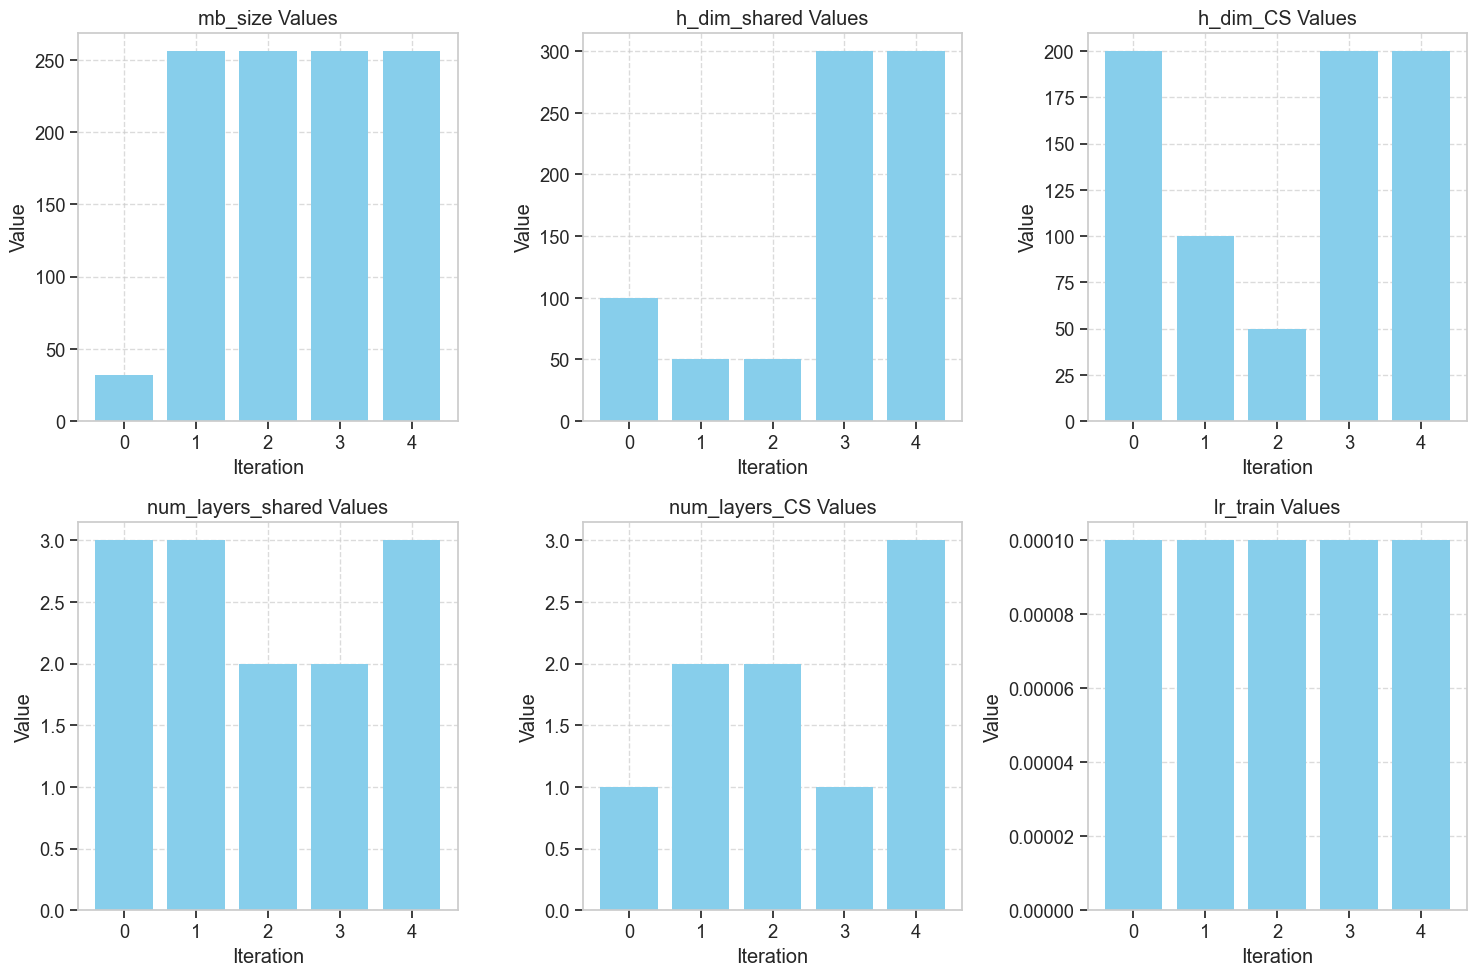

In [38]:
# First, make sure you have your hyperparameter dataframe loaded
# If you don't have hp_df defined, you need to load or create it

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

key_params = ['mb_size', 'h_dim_shared', 'h_dim_CS', 'num_layers_shared', 'num_layers_CS', 'lr_train']
for i, param in enumerate(key_params):
    if param in hp_df.columns:
        axes[i].bar(hp_df['iteration_number'], hp_df[param], color='skyblue')
        axes[i].set_title(f'{param} Values')
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()